In [1]:
import pandas as pd
import numpy as np
import markovify
import torch
import matplotlib.pyplot as plt
from ChordLanguageModel import ChordLanguageModel

In [9]:
CHAIN_ORDER = 3
N_CANDIDATES = 50000
N_BARS = 8
DATA_PATH = "chords3.csv"
rnn_config = {
    "HIDDEN_DIM": 100,
    "EMBED_DIM": 250,
    "DROPOUT": 0.1,
    "L2": 0.0005,
    "LEARNING_RATE": 0.001,
    "BATCH_SIZE": 16,
    "N_LAYERS": 1,
    "N_EPOCHS" :70
}

In [3]:
clm = ChordLanguageModel(DATA_PATH)
clm.train_model(rnn_config)

784
197


/Users/lauri/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:57: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


EPOCH 0: tensor(256.0971, grad_fn=<AddBackward0>)
TEST LOSS: tensor(4.2264)
EPOCH 1: tensor(196.4226, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.9353)
EPOCH 2: tensor(184.4800, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.7604)
EPOCH 3: tensor(176.0550, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.6333)
EPOCH 4: tensor(169.4529, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.5435)
EPOCH 5: tensor(164.1537, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.4712)
EPOCH 6: tensor(160.0799, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.4157)
EPOCH 7: tensor(156.6096, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.3748)
EPOCH 8: tensor(153.8892, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.3446)
EPOCH 9: tensor(150.5749, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.3085)
EPOCH 10: tensor(148.2274, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.2845)
EPOCH 11: tensor(145.8311, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.2589)
EPOCH 12: tensor(144.2097, grad_fn=<AddBackward0>)
TEST LOSS: tensor(3.2520)
EPOCH 13:

In [10]:
df = pd.read_csv(DATA_PATH)
df.chords = df.chords.apply(lambda x: eval(x))
mc_data = df.chords.to_numpy().tolist()
mc = markovify.Chain(mc_data, state_size=CHAIN_ORDER)

In [15]:
def validate_time(c):
    bars = 0
    time = 0
    fail = False
    for chord in c:
        time += 1/int(chord[0])
        if time == 1:
            bars = bars + 1
            time = 0
            continue
        if time > 1:
            fail = True
            break
    if not fail:
        if bars == N_BARS:
            return True
    else:
        return False
def validate_walk_length(c):
    if len(c) == N_BARS:
        return True
candidates = []
for i in range(N_CANDIDATES):
    c = mc.walk()
    candidates.append(c)
accepted = []
for candidate in candidates:
    if validate_walk_length(candidate):
        accepted.append(candidate)
accepted = [[c[1] for c in cp] for cp in accepted]
#accepted

In [16]:
scores = clm.evaluate(accepted)
#scores

In [17]:
scored = []
for i in range(len(accepted)):
    scored.append((accepted[i], scores[i]))
scored.sort(key=lambda x: x[1], reverse=True)
best = scored[:20]
best

[(['Dm7', 'G7', 'Cmaj7', 'Dm7', 'G7', 'C6', 'Dm7', 'G7'], -20.051342010498047),
 (['D7', 'Dm7', 'G7', 'Dm7', 'G7', 'C6', 'Dm7', 'G7'], -20.066665649414062),
 (['Dbm', 'A7', 'Dm7', 'G7', 'Em7', 'A7', 'Dm7', 'G7'], -20.22988510131836),
 (['Cmaj7', 'Am7', 'Dm7', 'G7', 'Cmaj7', 'Am7', 'Dm7', 'G7'],
  -20.39394760131836),
 (['Cmaj7', 'Am7', 'Dm7', 'G7', 'Cmaj7', 'Am7', 'Dm7', 'G7'],
  -20.39394760131836),
 (['Cmaj7', 'Am7', 'Dm7', 'G7', 'Cmaj7', 'Am7', 'Dm7', 'G7'],
  -20.39394760131836),
 (['Cmaj7', 'Am7', 'Dm7', 'G7', 'Cmaj7', 'Am7', 'Dm7', 'G7'],
  -20.39394760131836),
 (['Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm'], -20.419933319091797),
 (['Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm', 'Cm'], -20.419933319091797),
 (['Cmaj7', 'Dm7', 'G7', 'Dm7', 'G7', 'C6', 'Dm7', 'G7'], -20.93349266052246),
 (['Cmaj7', 'Dm7', 'G7', 'Dm7', 'G7', 'C6', 'Dm7', 'G7'], -20.93349266052246),
 (['Dm7', 'G7', 'Em7', 'A7', 'Dm7', 'G7', 'C6', 'C6'], -21.1406192779541),
 (['Dm7', 'G7', 'Dm7', 'G7', 'Dm7', 'G7', 'C6

<function matplotlib.pyplot.show(*args, **kw)>

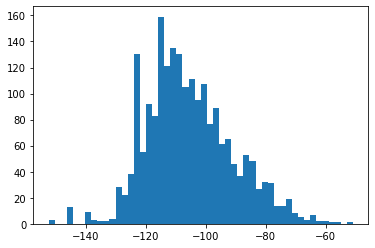

In [14]:
plt.hist(scores, bins = 50)
plt.show